In [1]:
import os
os.chdir("/Users/evanrootness/Project1/ProjectTwo")
pwd = os.getcwd()
print(pwd)

/Users/evanrootness/Project1/ProjectTwo


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys  

In [3]:
import_data = pd.read_csv(pwd + '/data/DATA (1).csv')
raw_data = import_data.copy()

In [4]:

# test = pd.read_csv('/kaggle/input/titanic/test.csv')

# training['train_test'] = 1
# test['train_test'] = 0
# test['Survived'] = np.NaN
# all_data = pd.concat([training,test])
# all_data.columns

# Data Exploration

In [5]:
print(raw_data.shape)
raw_data

(145, 33)


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [6]:
raw_data.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


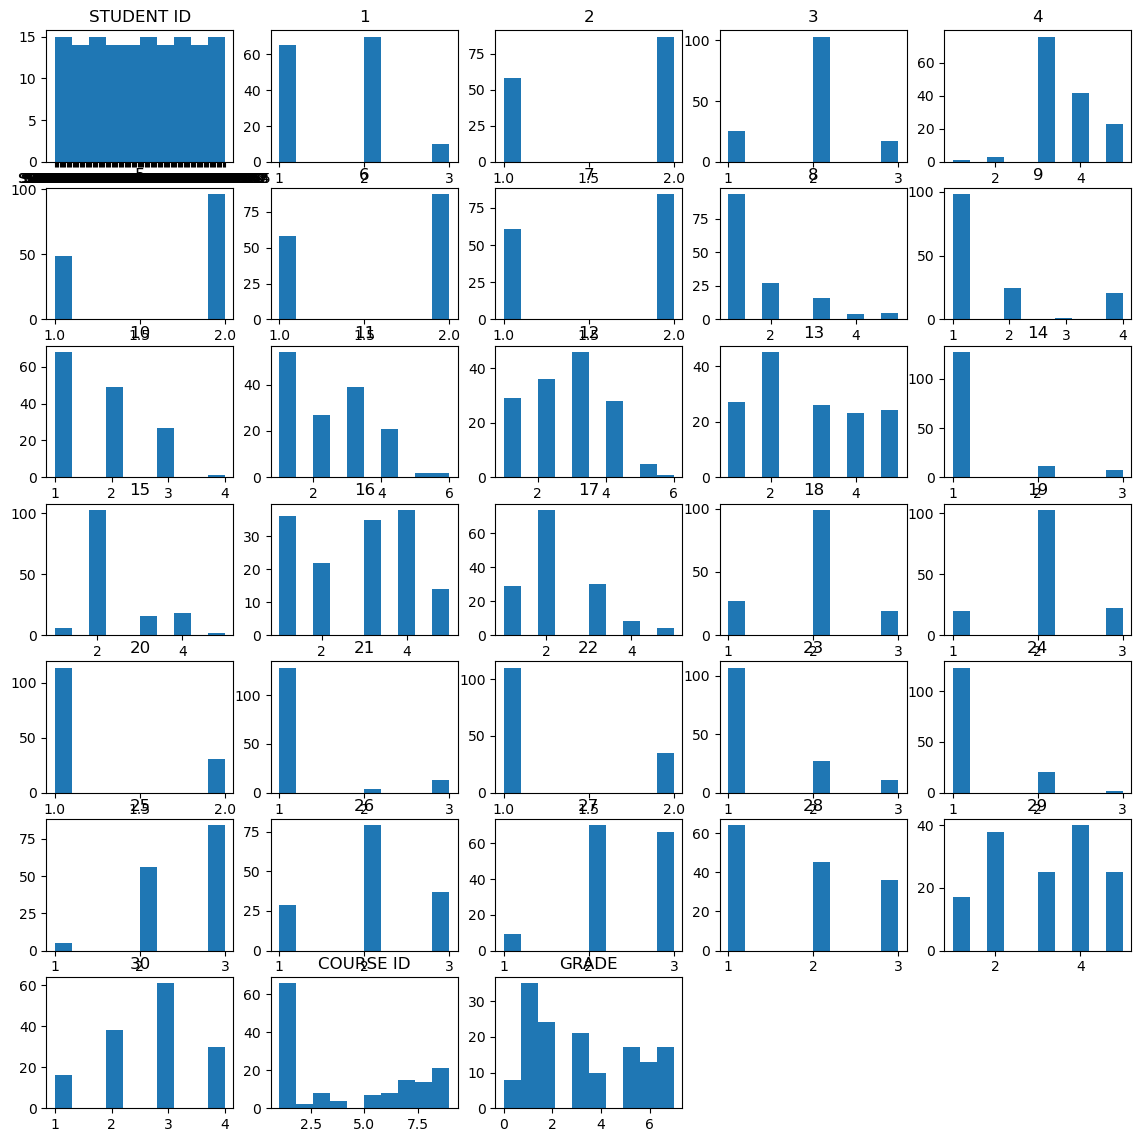

In [7]:
# distributions for all numeric variables 
length_df_num = len(raw_data.iloc[0, :])
width = 5
height = math.ceil(length_df_num / width)
row = 1
row_index = 0
column_index = 0
plt.figure(figsize = (14, 14))
for i in raw_data.columns:
    ax = plt.subplot2grid((height, width), (row_index, column_index))
    # ax.bar(raw_data[i], height=raw_data['GRADE'])
    ax.hist(raw_data[i])
    ax.set_title(i)
    if ((column_index + 1) % width == 0): #0, 1, 2, 3      4, 5, 6, 7
        row_index += 1
        column_index = 0
    else:
        column_index += 1

1 (age), 2 (gender), 5 (additional work), 18 (reading freq lit, 22 (class attendance), 26 (listening in class), 27 (discussion interest), 29 (GPA first sem), 30 (expected GPA),books) 

<Axes: >

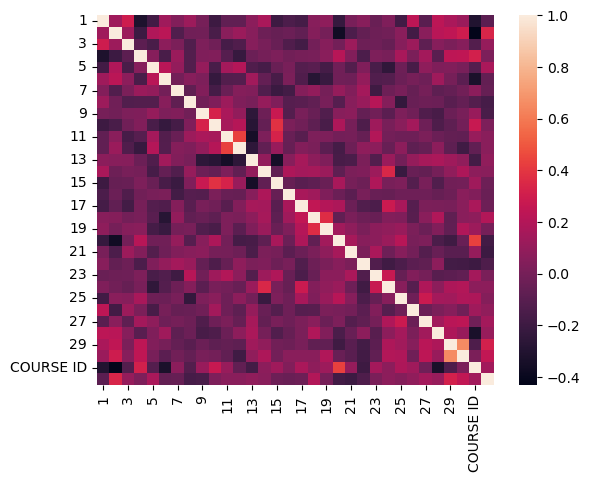

In [8]:
sns.heatmap(raw_data.iloc[:, 1:].corr())

<BarContainer object of 2 artists>

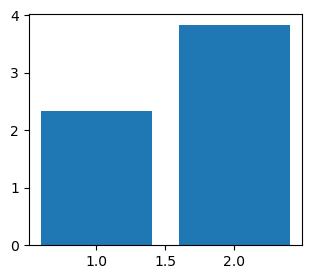

In [28]:
female_avg = raw_data.query("`2` == 1")['GRADE'].mean()
male_avg = raw_data.query("`2` == 2")['GRADE'].mean()
plt.figure(figsize = (12, 3))
ax = plt.subplot(131)
plt.bar(x = np.arange(1, 3), height = [female_avg, male_avg])

[2.40740741 3.32323232 3.89473684]


<BarContainer object of 3 artists>

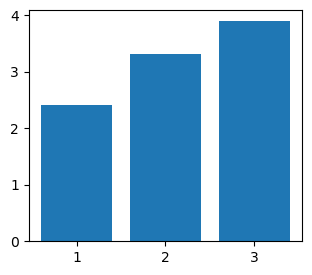

In [29]:
def avg_grades_one_column(data, column, num_choices):
    array = np.array([])
    for i in np.arange(num_choices):
        array = np.append(array, data.query(f"`{column}` == {i + 1}")['GRADE'].mean())
    return array

# 18 reading freq non-scientific
avg_grades_read_nonsci = avg_grades_one_column(raw_data, 18, 3)
print(avg_grades_read_nonsci)

plt.figure(figsize = (12, 3))
ax = plt.subplot(131)
plt.bar(x = np.arange(1, len(avg_grades_read_nonsci) + 1), height = avg_grades_read_nonsci)

In [11]:
sys.path.insert(1, '/Users/evanrootness/Project1/ProjectTwo/py_scripts/')
import explore

In [12]:
raw_data.query('`27` == 1').loc[:, "GRADE"]

0      1
2      1
5      2
67     1
80     4
108    6
113    1
114    2
121    0
Name: GRADE, dtype: int64

[3.43076923 3.11428571 2.7               nan        nan]


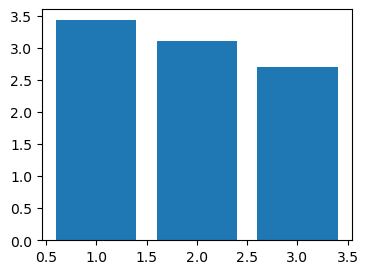

In [199]:
test_corr = explore.avg_grades_one_column(raw_data, '1', 5)
plt.figure(figsize = (4, 3))
plt.bar(x = np.arange(1, len(test_corr) + 1), height = test_corr)
print(test_corr)

In [15]:
x = raw_data[['1', '2', '5', '18', '22', '26', '27', '29', '30']]
y = raw_data['GRADE']

In [64]:
raw_data

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [63]:
# raw_data.query('GRADE == 0')

# Pre-processing (~~Outlier removal~~, Encoding Data)

No outliers observed in dataset due to limited answers.

In [71]:
raw_data

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [138]:
# # one-hot encoding not necessary for these columns because their order DOES matter


# categories_dict = {'1': 'age', '18': 'reading', '26': 'listening', '27': 'discussion', '30': 'expected'}
# # print(categories_dict.iloc[0])
# encoded_data = raw_data.copy()
# for entry in categories_dict:
#     # print(entry)
#     one_hot = pd.get_dummies(raw_data[str(entry)], dtype=int, prefix=categories_dict[str(entry)])

#     # # concatenate this one-hot encoding with the original dataframe and drop original columns
#     encoded_data = pd.concat([encoded_data, one_hot], axis=1)
#     encoded_data = encoded_data.drop(str(entry), axis=1)

# # note that this method does not work on columns with only 2 unique entries already. 
# # we will add those columns (2, 5, 22) next

In [283]:
# "One-hot encoding" really just converting 1's and 2's to 0's and 1's as practice
encoded_data = raw_data.copy()

cats_dict2 = {'2': 'gender', '5': 'work', '6': 'sports', '7': 'partner', '22': 'attendance'}
for entry in cats_dict2:
    list = []
    for value in encoded_data[str(entry)]:
        if (value == 2):
            list.append(1)
        else:
            list.append(0)
            
    encoded_data[cats_dict2[str(entry)]] = list
    
    encoded_data.drop(str(entry), axis=1, inplace=True)

In [284]:
# Columns that have more than two values, and whose order matters
categories_dict = {'1': 'age', '18': 'reading', '26': 'listening', '27': 'discussion', '30': 'expected'}
for entry in categories_dict:
    new_df = encoded_data[[str(entry)]].copy().rename(columns={str(entry): categories_dict[str(entry)]})
    encoded_data = pd.concat([encoded_data, new_df], axis=1)
    encoded_data.drop(str(entry), axis=1, inplace=True)

In [288]:
encoded_data.columns[23:]

Index(['gender', 'work', 'sports', 'partner', 'attendance', 'age', 'reading',
       'listening', 'discussion', 'expected'],
      dtype='object')

In [286]:
encoded_data

,STUDENT ID,3,4,8,9,10,11,12,13,14,...,gender,work,sports,partner,attendance,age,reading,listening,discussion,expected
0,STUDENT1,3,3,1,1,1,1,2,3,1,...,1,0,1,1,0,2,2,2,1,1
1,STUDENT2,3,3,1,1,1,2,3,2,1,...,1,0,1,1,0,2,2,2,3,3
2,STUDENT3,2,3,2,4,2,2,2,2,1,...,1,1,1,1,0,2,1,2,1,2
3,STUDENT4,1,3,2,1,2,1,2,5,1,...,0,0,1,0,0,1,1,2,2,2
4,STUDENT5,1,3,3,1,4,3,3,2,1,...,1,1,1,0,0,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,3,1,1,2,1,2,2,2,...,0,0,0,1,0,2,3,1,2,3
141,STUDENT142,2,4,1,4,2,1,1,5,1,...,0,1,1,1,1,1,2,2,2,3
142,STUDENT143,1,4,1,1,1,3,4,4,1,...,0,1,1,1,0,1,2,3,2,3
143,STUDENT144,2,4,5,2,3,4,4,1,1,...,0,0,0,0,0,2,2,1,2,3


# Train Test Split

In [314]:
x_train, xtest, y_train, ytest = train_test_split(encoded_data[encoded_data.columns[23:]], 
                                                  encoded_data['GRADE'], test_size=0.4, random_state=15)

# Scaling

In [318]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train) 

data_scaled = encoded_data.copy()
data_scaled[['age', 'reading', 'listening', 'discussion', 'expected']] = scaler.fit_transform(data_scaled[['age', 'reading', 'listening', 'discussion', 'expected']])
data_scaled

x_train, xtest, y_train, ytest = train_test_split(data_scaled[encoded_data.columns[23:]], 
                                                  encoded_data['GRADE'], test_size=0.5, random_state=15)#, stratify=y_train)

# ML

In [325]:
print(y_train[y_train == 0])

136    0
121    0
139    0
128    0
Name: GRADE, dtype: int64


In [319]:
from sklearn.linear_model import RidgeClassifier          # Just an Example  
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

model = RidgeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(xtest)

# Calculate Classification metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print(f"RidgeClassifier model scores Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

confusion_matrix(ytest, y_pred, labels = [1,0])

RidgeClassifier model scores Accuracy: 0.1232876712328767, Precision: 0.08823874755381604, Recall: 0.1232876712328767, F1-Score: 0.09882456457798924


/Users/evanrootness/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[3, 0],
       [1, 0]])

Which columns do I want to use?
1 (age), 2 (gender), 5 (additional work), 18 (reading freq lit, 22 (class attendance), 26 (listening in class), 27 (discussion interest), ~~29 (GPA first sem)~~, 30 (expected GPA)) 

In [291]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [322]:
# Bayesian
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train, y_train, cv=3)
print(cv)
print(cv.mean())

[0.25       0.29166667 0.25      ]
0.2638888888888889


/Users/evanrootness/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [317]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv=6)
print(cv)
print(cv.mean())

[0.13333333 0.2        0.13333333 0.28571429 0.21428571 0.35714286]
0.22063492063492063


/Users/evanrootness/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=6.
  warnings.warn(


In [335]:
# K near neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv=2)
print(cv)
print(cv.mean())

[0.27777778 0.13888889]
0.20833333333333334
